In [1]:
import random
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop, SGD
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')
import matplotlib.pyplot as plt 
%matplotlib inline

/Users/kamilwroniewicz/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/kamilwroniewicz/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
path_to_dataset = './mnist.pkl.gz'

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data(path_to_dataset)

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
X_train /= 255
X_test /= 255

In [6]:
X_train.shape

(60000, 784)

In [7]:
X_test.shape

(10000, 784)

In [8]:
batch_size = 128
classes = 10
epochs = 10

# Convert class vectors to binary class matrices for softmax layer
y_train = keras.utils.np_utils.to_categorical(y_train, classes)
y_test = keras.utils.np_utils.to_categorical(y_test, classes)

In [9]:
y_train.shape

(60000, 10)

In [10]:
y_test.shape

(10000, 10)

In [11]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
__________

In [13]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train,
                   batch_size=batch_size, epochs=epochs,
                   verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.2470 - acc: 0.9249 - val_loss: 0.1100 - val_acc: 0.9641
Epoch 2/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.1028 - acc: 0.9690 - val_loss: 0.0766 - val_acc: 0.9764
Epoch 3/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0748 - acc: 0.9773 - val_loss: 0.0744 - val_acc: 0.9793
Epoch 4/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0585 - acc: 0.9815 - val_loss: 0.0913 - val_acc: 0.9745
Epoch 5/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0498 - acc: 0.9844 - val_loss: 0.0813 - val_acc: 0.9784
Epoch 6/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0439 - acc: 0.9867 - val_loss: 0.0777 - val_acc: 0.9798
Epoch 7/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.0390 - acc: 0.9883 - val_loss: 0.0831 - 

In [15]:
history.params

{'batch_size': 128,
 'do_validation': True,
 'epochs': 10,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 60000,
 'steps': None,
 'verbose': 1}

In [16]:
history.history

{'acc': [0.9248833333333333,
  0.9689666666666666,
  0.9773333333651225,
  0.9814999999682108,
  0.9844499999682108,
  0.9867,
  0.9882833333651225,
  0.9901166666348775,
  0.99125,
  0.9915666666666667],
 'loss': [0.24698100752035776,
  0.10280760132223368,
  0.07479597290555635,
  0.05846697346468767,
  0.04980767638161778,
  0.043855198533833024,
  0.03898139586846034,
  0.03307432450656779,
  0.029428220517591884,
  0.02836534192028145],
 'val_acc': [0.9641,
  0.9764,
  0.9793,
  0.9745,
  0.9784,
  0.9798,
  0.9812,
  0.9798,
  0.9839,
  0.9802],
 'val_loss': [0.10997803336381912,
  0.07662255055718124,
  0.07435848027393221,
  0.09133492634631693,
  0.08131390620398452,
  0.07766833946208063,
  0.0831422679121606,
  0.09317761600866943,
  0.08343357531217116,
  0.1009711194456715]}

In [18]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 61us/step
Test score: 0.10097112615412875
Test accuracy: 0.9802


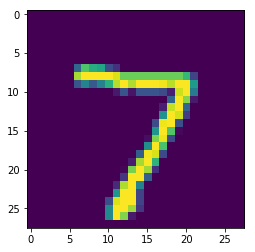

In [20]:
X_test_0 = X_test[0,:].reshape(1,784)
y_test_0 = y_test[0,:]
plt.imshow(X_test_0.reshape([28, 28]))

In [22]:
pred = model.predict(X_test_0)
print('Label of testing sample:', np.argmax(y_test_0))
print('Output of the softmax layer', pred[0])
print('Network prediction:', np.argmax(pred[0]))

Label of testing sample: 7
Output of the softmax layer [3.5827454e-25 4.6791169e-16 2.2247402e-16 2.1299120e-15 1.4592084e-25
 1.1024463e-20 8.8209006e-30 1.0000000e+00 5.7869233e-21 3.4263459e-16]
Network prediction: 7
